In [1]:
import pandas as pd
import statsmodels.stats.multitest as smm
import scipy.stats as st
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Размер кредитного лимита (LIMIT_BAL). ##
В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

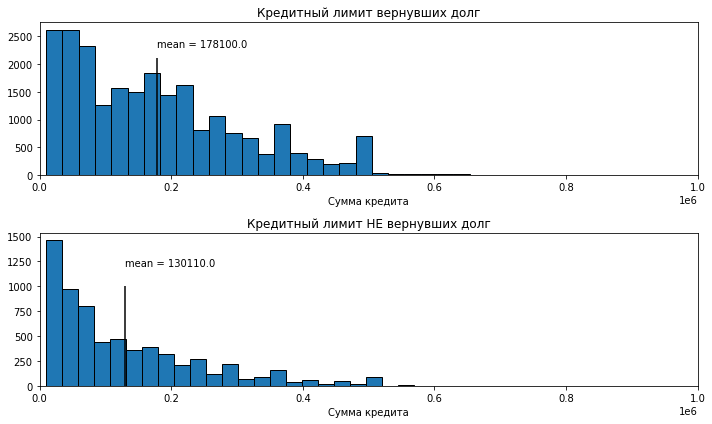

In [3]:
cond = data.default == 0

plt.figure(1, figsize=(10,6))
plt.subplot(211)
plt.hist(data.LIMIT_BAL[cond], 40, edgecolor='k')
plt.xlim(0, 1e6)
mean = data.LIMIT_BAL[cond].mean()
plt.vlines(mean, 0, 2100)
plt.text(mean, 2300, 'mean = ' + str(round(mean)))
plt.title('Кредитный лимит вернувших долг')
plt.xlabel('Сумма кредита')


plt.subplot(212)
plt.hist(data.LIMIT_BAL[~cond], 30, edgecolor='k')
plt.xlim(0, 1e6)
mean = data.LIMIT_BAL[~cond].mean()
plt.vlines(mean, 0, 1000)
plt.text(mean, 1200, 'mean = ' + str(round(mean)))
plt.title('Кредитный лимит НЕ вернувших долг')
plt.xlabel('Сумма кредита')
plt.tight_layout()
plt.show()

Анализ гистограмм показывает, что данные распределены не нормально, следовательно, обоснованно использование непараметрических критериев. Распределения визуально отличаются - кредитный лимит "хороших" кредитов имеет более "тяжелый хвост", что говорит о том, что, скорее всего, добросовестные заемщики берут больше денег в долг. Данное предположение будет проверено с помощью механизм проверки гипотез.

### Проверка гипотезы о равенстве медиан интервальным методом и статистическим критерием ###
**Выбранный метод:**  
Бутстрап

**Гипотезы:**  
Проверяется гипотеза о равенстве медиан против двухсторонней альтернативы.

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries


boot_samples = get_bootstrap_samples(np.array(data.LIMIT_BAL[cond]), 1000)
medians_good = np.median(boot_samples, axis=1)

print('Доверительный интервал для медианы размера кредита, который вернули =', stat_intervals(medians_good, 0.05))

boot_samples = get_bootstrap_samples(np.array(data.LIMIT_BAL[~cond]), 1000)
medians_bad = np.median(boot_samples, axis=1)
print('Доверительный интервал для медианы размера кредита, который НЕ вернули =', stat_intervals(medians_bad, 0.05))

print('Доверительный интервал разности медиан =', stat_intervals(medians_bad - medians_good, 0.05))

Доверительный интервал для медианы размера кредита, который вернули = [150000. 150000.]
Доверительный интервал для медианы размера кредита, который НЕ вернули = [80000. 90000.]
Доверительный интервал разности медиан = [-70000. -60000.]


Доверительные интервалы **не пересекаются**, интервал для разницы не содержит ноль, следовательно, гипотеза о равенстве медиан отвергается на уровне значимости 0.05. Заемщики, не способные вернуть кредит, чаще занимают меньшую сумму.

### Проверка гипотезы ###
**Выбранный метод:**  
Критерий Манна-Уитни

**Гипотезы:**  
Проверяется гипотеза о равенстве средних против двухсторонней альтернативы.

**Требования:**
Критерий не требует нормальности распределения данных или симметричности распределения. Его допустимо применять для имеющихся данных.

In [5]:
print('Точечные оценки средних. Хорошие кредиты: ', int(data.LIMIT_BAL[cond].mean()), ', плохие кредиты: ', int(data.LIMIT_BAL[~cond].mean()), sep='')

p = st.mannwhitneyu(data.LIMIT_BAL[cond], data.LIMIT_BAL[~cond]).pvalue

print('p-value =', p, '\nГипотеза о равенстве средних отвергается на уровне значимости 0.05')
print('Эффект практически значим. Оценка размера эффекта:', int(data.LIMIT_BAL[cond].mean()) - int(data.LIMIT_BAL[~cond].mean()))

Точечные оценки средних. Хорошие кредиты: 178099, плохие кредиты: 130109
p-value = 6.127742909111652e-190 
Гипотеза о равенстве средних отвергается на уровне значимости 0.05
Эффект практически значим. Оценка размера эффекта: 47990


Средние размеры кредитов различны. Различия значимы статистически и практически, так как разница между точечными средними оценками значительна, равно как и расстояние между ближайшими границами доверительного интервала медиан.  
  
Оценка для размера эффекта: в среднем заемщики, не отдающие кредит, берут в долг на 47990 рублей меньше чем заемщики, отдающие кредит.

## Пол (SEX) ##
Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия) 

Text(0.5, 0, 'Пол')

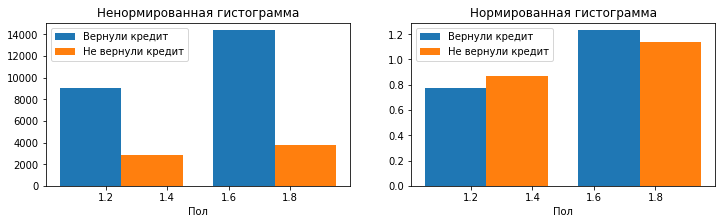

In [6]:
cond = data.default == 0

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist((data.SEX[cond], data.SEX[~cond]), 2, density=False)
plt.title('Ненормированная гистограмма')
plt.legend(['Вернули кредит', 'Не вернули кредит'])
plt.xlabel('Пол')

plt.subplot(122)
plt.hist((data.SEX[cond], data.SEX[~cond]), 2, density=True)
plt.title('Нормированная гистограмма')
plt.legend(['Вернули кредит', 'Не вернули кредит'])
plt.xlabel('Пол')

Анализ нормированной гистограммы показыает, что заемщики одного из полов чаще других не возвращают кредиты. Данная гипотеза требует формальной проверки.  

Данные подчиняются распределению Бернулли, так как принимают одно из двух значений. Требуется проверить равенство отношения количества заемщиков одного пола к количеству заемщиков другого пола среди двух выборок.


**Проверка будет проведена с использованием:**
 1. Доверительного интервала для разности долей
 2. Z-теста для двух независимых выборок

In [7]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

### Проверка гипотезы ###
**Выбранный метод:**  
Построение доверительного интервала для разности и Z-тест для доли

**Гипотезы:**  
Проверяется гипотеза об одинаковом гендерном составе против двухстороней альтернативы

**Требования:**
Критерий требует, чтоб величина принимала одно из двух значений (выполняется)

In [8]:
conf_int = proportions_confint_diff_ind(np.array(data.SEX[cond])-1, np.array(data.SEX[~cond])-1)
print('Разница в отношении количества заемщиков разного пола для "хороших" и "плохих" кредитов :\n', conf_int)
print('Гипотеза отвергется на уровне значимости 0.05.')

Разница в отношении количества заемщиков разного пола для "хороших" и "плохих" кредитов :
 (0.03363493274962867, 0.060548077974896725)
Гипотеза отвергется на уровне значимости 0.05.


Данные диапазон не содержит в себе ноль, следовательно, гипотеза об одинаковом гендерном составе отвергается на уровне значимости 0.05. Данная проверка также проведена с помощью Z-теста:

In [9]:
Z_st = proportions_diff_z_stat_ind(np.array(data.SEX[cond])-1, np.array(data.SEX[~cond])-1)
p_value = proportions_diff_z_test(Z_st)
print('p-value =', p_value)
print('Гипотеза отвергется на уровне значимости 0.05.')

delta = ((np.array(data.SEX[cond])-1).mean() - (np.array(data.SEX[~cond])-1).mean()) * 100
print('\nЭффект практически значим. Оценка для размера эффекта: на {}% больше женщин среди добросовестных заемщиков. С учетом количества людей, берущих кредиты, данное различие можно считать практически значимым.'.format(round(delta, 3)))


p-value = 4.472866521609831e-12
Гипотеза отвергется на уровне значимости 0.05.

Эффект практически значим. Оценка для размера эффекта: на 4.709% больше женщин среди добросовестных заемщиков. С учетом количества людей, берущих кредиты, данное различие можно считать практически значимым.


Достигаемый уровень значимости позволяет отвергнуть гипотезу об одинаковом гендерном составе отвергается на уровне значимости 0.05

## Образование (EDUCATION): ##
Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ? 

Text(0.5, 0, 'Уроверь образования')

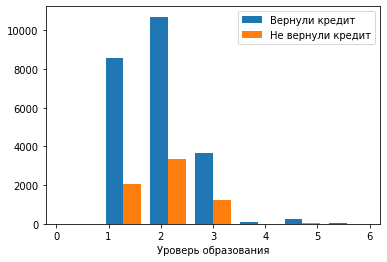

In [10]:
cond = data.default == 0

plt.hist((data.EDUCATION[cond], data.EDUCATION[~cond]), 7, density=False)
plt.legend(['Вернули кредит', 'Не вернули кредит'])
plt.xlabel('Уроверь образования')

Данные на графиках распределены приблизительно одинаково. Для анализа требуется формальная проверка.

### Проверка гипотезы ###
**Выбранный метод:**  
Критерий значимости корреляции $\chi^2$ для категориальных признаков

**Гипотезы:**  
Проверяется гипотеза об отсуствии влияния образования на возврат кредитов против общей альтернативы

**Требования:**
Критерий требует, чтоб данные были категориальными (выполняется)

Наблюдаемые частоты:
 [[   14     0]
 [ 8549  2036]
 [10700  3330]
 [ 3680  1237]
 [  116     7]
 [  262    18]
 [   43     8]] 

Точечные оценки вероятностей возврата долга:
 [1.    0.808 0.763 0.748 0.943 0.936 0.843] 

p-value = 1.2332626245415605e-32. Гипотеза о независимости возврата долга от уровня образования отвергается

Графики долей возврата и не возврата в зависимости от образования


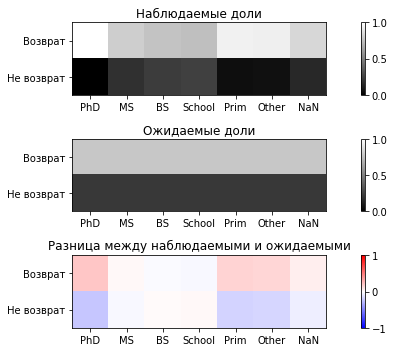

In [11]:
def get_con_table(a, b):
    a_vals = np.unique(a)
    b_vals = np.unique(b)
    table = np.zeros((len(a_vals),len(b_vals)), dtype=int)
    for i in range(len(a_vals)):
        for j in range(len(b_vals)):
            table[i, j] = sum((a == a_vals[i]) & (b == b_vals[j]))
    return table

obs = get_con_table(data.EDUCATION, data.default)
_, p_val, _, expected = st.chi2_contingency(obs)

print('Наблюдаемые частоты:\n', obs, '\n')

print('Точечные оценки вероятностей возврата долга:\n', np.round((obs.T/obs.sum(axis=1))[0], 3), '\n')

print('p-value = {}. Гипотеза о независимости возврата долга от уровня образования отвергается\n'.format(p_val))

plt.figure(figsize=(10, 5))
print('Графики долей возврата и не возврата в зависимости от образования')

plt.subplot(311)
plt.title('Наблюдаемые доли')
plt.imshow(obs.T/obs.sum(axis=1), cmap='gist_gray')
plt.colorbar()
plt.gca().set_yticklabels(['','Возврат', 'Не возврат'])
plt.gca().set_xticklabels(['', 'PhD', 'MS', 'BS', 'School', 'Prim', 'Other', 'NaN'])

plt.subplot(312)
plt.title('Ожидаемые доли')
plt.imshow(expected.T/expected.sum(axis=1), cmap='gist_gray', vmin=0, vmax=1)
plt.colorbar()
plt.gca().set_yticklabels(['','Возврат', 'Не возврат'])
plt.gca().set_xticklabels(['', 'PhD', 'MS', 'BS', 'School', 'Prim', 'Other', 'NaN'])
plt.tight_layout()

plt.subplot(313)
plt.title('Разница между наблюдаемыми и ожидаемыми')
plt.imshow((obs - expected).T/expected.sum(axis=1), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.gca().set_yticklabels(['','Возврат', 'Не возврат'])
plt.gca().set_xticklabels(['', 'PhD', 'MS', 'BS', 'School', 'Prim', 'Other', 'NaN'])
plt.tight_layout()

 > Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?  

Ответ на вопрос:
 1. Наличие докторской степени является наилучшим индикатором того, что человек отдаст долг.
 2. Наличие школьного образования является лучшим индикатором того, что человек не отдаст долг.
 
 ### ответили бы мы так, если бы не знали статистику ###
 
Данных по докторам очень мало, и такие результаты могли получится случайно. У людей с начальным образованием и людей в категории "другое" тоже высокие точечные оценки. Нулевая гипотеза: шансы возврата денег равны у докторов и людей с начальным образованием, и у докторов и заемщиков из категории "другое". Обе гипотезы проверяются против общей альтернативы. Это проверка двух гипотез, поэтому будет сделана поправка на множественную проверку.

In [12]:
phd_def = data.default[data.EDUCATION == 0]#3
prim_def = data.default[data.EDUCATION == 4]
oth_def = data.default[data.EDUCATION == 5]

probs = []

Z_st = proportions_diff_z_stat_ind(np.array(phd_def), np.array(prim_def))
p_value = proportions_diff_z_test(Z_st)
probs.append(p_value)

Z_st = proportions_diff_z_stat_ind(np.array(phd_def), np.array(oth_def))
p_value = proportions_diff_z_test(Z_st)
probs.append(p_value)


rej, p_vals, *_ = smm.multipletests(probs, method='holm')

print('Можем ли откинуть гипотезы?', rej)
print('Скорректированные уровни значимости', p_vals)

Можем ли откинуть гипотезы? [False False]
Скорректированные уровни значимости [0.65503145 0.65503145]


Можно повторить тест на значимость корреляции для категорий докторов, "начальное образование" и "другое" против общей альтернативы. Гипотеза не будет отвергнута, так как эти категории одинаково хорошо возвращают деньги.

In [13]:
temp_cond = np.array([E in [0,4,5] for E in data.EDUCATION])
obs = get_con_table(data.EDUCATION[temp_cond], data.default[temp_cond])
_, p_val, _, expected = st.chi2_contingency(obs)
print('Достигаемый уровень значимости {:0.2f}, мы не можем отвергнуть гипотезу о зависимости уровня образования для этих категорий'.format(p_val))

Достигаемый уровень значимости 0.60, мы не можем отвергнуть гипотезу о зависимости уровня образования для этих категорий


Для ответа на вопрос о категории, которая хуже всех возвращает долги, следует протестировать школьников (у них худшая точечная оценка) и бакалавров (следующие по "возвращаемости")

In [14]:
def1 = data.default[data.EDUCATION == 2]
def2 = data.default[data.EDUCATION == 3]

Z_st = proportions_diff_z_stat_ind(np.array(def1), np.array(def2))
p_value = proportions_diff_z_test(Z_st)
print('p-value =', p_value)
print('Гипотеза отвергется на уровне значимости 0.05.')

p-value = 0.04473034193821812
Гипотеза отвергется на уровне значимости 0.05.


 > Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?  

Ответ на вопрос:
 1. Имеющихся данных недостаточно, чтоб сделать статистически значимые выводы о единственности категории лучших заемщиков. Наиболее занежные категории: доктора, школьники и "другое"
 2. Наличие школьного образования является лучшим индикатором того, что человек не отдаст долг.
 
Оценка практической значимости обнаруженного эффекта:  
Упорядочим шансы на возврат и вычислим разность между соседними шансами (если бы от уровня образования шансы не зависили, то эти величины были бы близки к нулю)  
  
Объем потребительских кредитов за 2019 год равен 8.2 миллиарда. Источник:
https://asros.ru/upload/iblock/032/Obzor-rynka-potrebitelskogo-kreditovaniya_1-polugodie-2019.pdf  
Умножим среднее разниц на этот показатель. Это будет оценкой размера эффекта.

In [15]:
obs = get_con_table(data.EDUCATION, data.default)
diff = np.diff(np.sort((obs.T/obs.sum(axis=1))[0]))

val = 8.2e12
print('Оценка размера эффекта: {:.2f} рублей. Эффект практически значим.'.format(val * diff.mean()))

Оценка размера эффекта: 343820757914.72 рублей. Эффект практически значим.


## Семейное положение (MARRIAGE): ##
Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Text(0.5, 0, 'Уроверь образования')

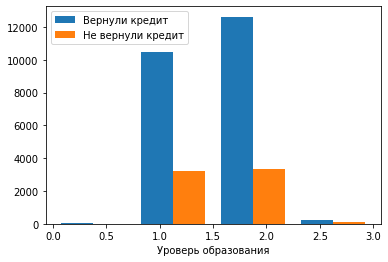

In [16]:
cond = data.default == 0

plt.hist((data.MARRIAGE[cond], data.MARRIAGE[~cond]), 4, density=False)
plt.legend(['Вернули кредит', 'Не вернули кредит'])
plt.xlabel('Уроверь образования')

Данные на графиках распределены приблизительно одинаково. Для анализа требуется формальная проверка.

Сначала требуется проверить, присутствует ли взаимосвязь между возвратом кредитов и семейным положением.

### Проверка гипотезы ###
**Выбранный метод:**  
Критерий значимости корреляции $\chi^2$ для категориальных признаков

**Гипотезы:**  
Проверяется гипотеза об отсуствии влияния семейного положения на возврат кредитов против общей альтернативы

**Требования:**
Критерий требует, чтоб данные были категориальными (выполняется)

In [17]:
obs = get_con_table(data.MARRIAGE, data.default)

print('Таблица сопряженности\n', obs, '\n')

_, p_val, _, expected = st.chi2_contingency(obs)
print('Достагаемый уровень значимости =', p_val)
print('Гипотеза отвергется на уровне значимости 0.05.')

Таблица сопряженности
 [[   49     5]
 [10453  3206]
 [12623  3341]
 [  239    84]] 

Достагаемый уровень значимости = 8.825862457577375e-08
Гипотеза отвергется на уровне значимости 0.05.


Гипотеза об отсутствии связи отвергается.  
Далее требуется выбрать меру для оценки этой связи. Предлагаемая мера - **корреляция V Крамера**. Альтернативная предлагаемая мера (более просто интерпретируемая) - разность оценок шанса возврата кредита для вредиторов с семьей и без. Категории "неизвестно" и "отказываюсь отвечать" будут выброшены, так как их доля в выборке слишком мала (~1%). Перед этим дополнительно будет проведен Z-test для проверки различия средних между этими двумя категориями.

In [18]:
def corr_v_cramer(con):
    chi2_val, *_ = st.chi2_contingency(con, correction=False)
    k1 = con.shape[0]
    k2 = con.shape[1]
    n = np.sum(con)
    V = np.sqrt(chi2_val / (n * (np.min([k1, k2]) - 1)))
    return V

print('Значение корреляции V Крамера ={}. Значение малое, однако проверенный ранее критерий говорит, что данное значение статистически значимо.'.format(corr_v_cramer(obs)))

Значение корреляции V Крамера =0.034478203662766466. Значение малое, однако проверенный ранее критерий говорит, что данное значение статистически значимо.


### Проверка гипотезы ###
**Выбранный метод:**  
Построение доверительного интервала для разности и Z-тест для доли

**Гипотезы:**  
Проверяется гипотеза об одинаковой доле возврата кредитов у семейных и холостых заемщиков против двухстороней альтернативы

**Требования:**
Критерий требует, чтоб величина принимала одно из двух значений (выполняется)

In [19]:
temp_cond_1 = data.MARRIAGE == 1
temp_cond_2 = data.MARRIAGE == 2


Z_st = proportions_diff_z_stat_ind(np.array(data.default[temp_cond_1]), np.array(data.default[temp_cond_2]))
p_value = proportions_diff_z_test(Z_st)
print('p-value =', p_value)
print('Разность долей статистически значима, гипотеза отвергется на уровне значимости 0.05.')

delta = (np.array(data.default[temp_cond_1]).mean() - np.array(data.default[temp_cond_2]).mean()) * 100

print('Интерпретация предлагаемой меры: холостые заемщики отдают кредит с вероятностью на {:.2f}% меньше, чем заемщики в браке'.format(delta))
print('С учетом объемов кредитования результат практически значим.')

p-value = 1.448514344026819e-07
Разность долей статистически значима, гипотеза отвергется на уровне значимости 0.05.
Интерпретация предлагаемой меры: холостые заемщики отдают кредит с вероятностью на 2.54% меньше, чем заемщики в браке
С учетом объемов кредитования результат практически значим.


## Возраст (AGE): ##
Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

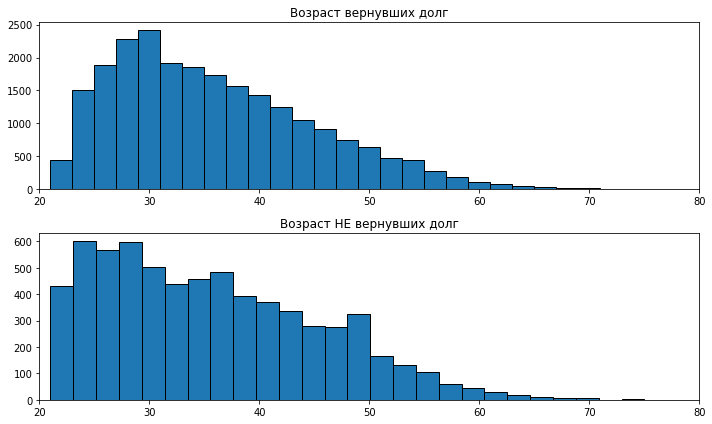

In [20]:
cond = data.default == 0

plt.figure(1, figsize=(10,6))
plt.subplot(211)
plt.hist(data.AGE[cond], 29, edgecolor='k')
plt.xlim(20, 80)
mean = data.AGE[cond].mean()
plt.title('Возраст вернувших долг')

plt.subplot(212)
plt.hist(data.AGE[~cond], 26, edgecolor='k')
plt.xlim(20, 80)
mean = data.AGE[~cond].mean()
plt.title('Возраст НЕ вернувших долг')
plt.tight_layout()
plt.show()

Данные на графиках распределены приблизительно одинаково. Для анализа требуется формальная проверка.


### Проверка гипотезы о равенстве медиан интервальным методом ###
**Выбранный метод:**  
Бутстрап

**Гипотезы:**  
Проверяется гипотеза о равенстве медиан против двухсторонней альтернативы.

**Требования:**
Требования для применения методы выполненяются

In [21]:
boot_samples = get_bootstrap_samples(np.array(data.AGE[cond]), 1000)
medians_good = np.median(boot_samples, axis=1)
print('Доверительный интервал для медианы возраста заемщика вернувшего долг', stat_intervals(medians_good, 0.05))

boot_samples = get_bootstrap_samples(np.array(data.AGE[~cond]), 1000)
medians_bad = np.median(boot_samples, axis=1)
print('Доверительный интервал для медианы возраста заемщика НЕ вернувшего долг =', stat_intervals(medians_bad, 0.05))

print('Интервалы пересекаются, требуется построить интервал для разности медиан')
print('Доверительный интервал разности медиан =', stat_intervals(medians_bad - medians_good, 0.05))

Доверительный интервал для медианы возраста заемщика вернувшего долг [34. 34.]
Доверительный интервал для медианы возраста заемщика НЕ вернувшего долг = [34. 35.]
Интервалы пересекаются, требуется построить интервал для разности медиан
Доверительный интервал разности медиан = [0. 1.]


Интервал для разности содержит ноль, следовательно нельзя отвергнуть гипотезу о равенстве медиан

### Проверка гипотезы о равенстве распределений ###
**Выбранный метод:**  
Критерий Манна-Уитни

**Гипотезы:**  
Проверяется гипотеза о равенстве средних против двухсторонней альтернативы.

**Требования:**
Критерий не требует нормальности распределения данных или симметричности распределения.

In [22]:
p = st.mannwhitneyu(data.AGE[cond], data.AGE[~cond]).pvalue

print('p-value =', p, '\nГипотеза о равенстве средних НЕ отвергается на уровне значимости 0.05')

p-value = 0.1862517717449308 
Гипотеза о равенстве средних НЕ отвергается на уровне значимости 0.05


 1. Оценка достигаемого уровня значимости позволяет сделать вывод о статистической незначимости результата
 2. Анализ доверительных интервалов показывает отсуствие практической значимости результатов.